In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bids.csv', 'train.csv', 'test.csv']


In [3]:
bid_data = pd.read_csv('../input/bids.csv')
print (bid_data.head(5))
train_data = pd.read_csv('../input/train.csv')
print (train_data.head(5))
test_data = pd.read_csv('../input/test.csv')
print (test_data.head(5))

   bid_id                              bidder_id auction merchandise  device  \
0       0  8dac2b259fd1c6d1120e519fb1ac14fbqvax8   ewmzr     jewelry  phone0   
1       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture  phone1   
2       2  aa5f360084278b35d746fa6af3a7a1a5ra3xe   wa00e  home goods  phone2   
3       3  3939ac3ef7d472a59a9c5f893dd3e39fh9ofi   jefix     jewelry  phone4   
4       4  8393c48eaf4b8fa96886edc7cf27b372dsibi   jefix     jewelry  phone5   

           time country              ip              url  
0  9.759240e+15      us   69.166.231.58  vasstdc27m7nks3  
1  9.759240e+15      in   50.201.125.84  jmqlhflrzwuay9c  
2  9.759240e+15      py  112.54.208.157  vasstdc27m7nks3  
3  9.759240e+15      in   18.99.175.133  vasstdc27m7nks3  
4  9.759240e+15      in    145.138.5.37  vasstdc27m7nks3  
                               bidder_id  \
0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1  624f258b49e77713fc34034560f93fb3hu3jo   
2  1c5f4fc669099bfbfac515cd26997b

In [4]:
def numberofActions(line, dataGrouped, dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return dataGrouped[line['bidder_id']]

def mergingFeature(line, features, dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return features[line['bidder_id']] 
    
def findMerchandise(line,grouped,dict,dataid):
    res = np.zeros(10)
    if line in dataid:
        merch = np.array(grouped[grouped['bidder_id']==line]['merchandise'])[0]
#         print merch
        res[dict[merch]] = 1
    return tuple(res)


In [5]:
def basicCountsPerUser():
    bidderList = bid_data['bidder_id'].unique()
    countryCount = bid_data['country'].groupby(bid_data['bidder_id']).count()
    ipCount = bid_data['ip'].groupby(bid_data['bidder_id']).count()
    urlCount = bid_data['url'].groupby(bid_data['bidder_id']).count()
    deviceCount = bid_data['device'].groupby(bid_data['bidder_id']).count()
    auctionCount = bid_data['auction'].groupby(bid_data['bidder_id']).count()
    grBidCount = bid_data['bid_id'].groupby(bid_data['bidder_id']).count()
    grMerchandiseCount = bid_data['merchandise'].groupby(bid_data['bidder_id']).count()
    payAccCountTrainList = train_data['payment_account'].groupby(train_data['bidder_id']).count()
    payAccCountTestList = test_data['payment_account'].groupby(test_data['bidder_id']).count()
    addressCountTrainList = train_data['address'].groupby(train_data['bidder_id']).count()
    addressCountTestList = test_data['address'].groupby(test_data['bidder_id']).count()

    train_data['nb0fCountry'] = train_data.apply(lambda x: numberofActions(x, countryCount, bidderList), axis=1)
    test_data['nb0fCountry'] = test_data.apply(lambda x: numberofActions(x, countryCount, bidderList), axis=1)

    train_data['nb0fIP'] = train_data.apply(lambda x: numberofActions(x, ipCount, bidderList), axis=1)
    test_data['nb0fIP'] = test_data.apply(lambda x: numberofActions(x, ipCount, bidderList), axis=1)

    train_data['nb0fURL'] = train_data.apply(lambda x: numberofActions(x, urlCount, bidderList), axis=1)
    test_data['nb0fURL'] = test_data.apply(lambda x: numberofActions(x, urlCount, bidderList), axis=1)

    train_data['nb0fDevice'] = train_data.apply(lambda x: numberofActions(x, deviceCount, bidderList), axis=1)
    test_data['nb0fDevice'] = test_data.apply(lambda x: numberofActions(x, deviceCount, bidderList), axis=1)

    train_data['nb0fAuction'] = train_data.apply(lambda x: numberofActions(x, auctionCount, bidderList), axis=1)
    test_data['nb0fAuction'] = test_data.apply(lambda x: numberofActions(x, auctionCount, bidderList), axis=1)

    train_data['nb0fBids'] = train_data.apply(lambda x: numberofActions(x, grBidCount, bidderList), axis=1)
    test_data['nb0fBids'] = test_data.apply(lambda x: numberofActions(x, grBidCount, bidderList), axis=1)

    train_data['nb0fMerch'] = train_data.apply(lambda x: numberofActions(x, grMerchandiseCount, bidderList), axis=1)
    test_data['nb0fMerch'] = test_data.apply(lambda x: numberofActions(x, grMerchandiseCount, bidderList), axis=1)

    train_data['nb0fPayAcc'] = train_data.apply(lambda x: numberofActions(x, payAccCountTrainList, bidderList), axis=1)
    test_data['nb0fPayAcc'] = test_data.apply(lambda x: numberofActions(x, payAccCountTestList, bidderList), axis=1)

    train_data['nb0fAdress'] = train_data.apply(lambda x: numberofActions(x, addressCountTrainList, bidderList), axis=1)
    test_data['nb0fAdress'] = test_data.apply(lambda x: numberofActions(x, addressCountTestList, bidderList), axis=1)
    

In [6]:
def bidsOnSelf():
    bidderList = bid_data['bidder_id'].unique()
    tmp_data = bid_data.sort_values(['auction', 'time']).groupby(bid_data['auction'])
    countBidsOnSelf = {}
    for t in tmp_data:
        prev = ''
        count = 0
        for b in t[1]['bidder_id']:
            if(b == prev):
                if(b in countBidsOnSelf.keys()):
                    count = countBidsOnSelf[b]
                    count += 1
            countBidsOnSelf[b] = count
            count = 0
            prev = b
    train_data['nb0fBidsOnSelf'] = train_data.apply(lambda x: mergingFeature(x, countBidsOnSelf, bidderList), axis=1)
    test_data['nb0fBidsOnSelf'] = test_data.apply(lambda x: mergingFeature(x, countBidsOnSelf, bidderList), axis=1)

In [7]:

def basicUniqueCountsPerUser():
    bidderList = bid_data['bidder_id'].unique()
    countryCount = bid_data['country'].groupby(bid_data['bidder_id']).nunique()
    ipCount = bid_data['ip'].groupby(bid_data['bidder_id']).nunique()
    urlCount = bid_data['url'].groupby(bid_data['bidder_id']).nunique()
    deviceCount = bid_data['device'].groupby(bid_data['bidder_id']).nunique()
    auctionCount = bid_data['auction'].groupby(bid_data['bidder_id']).nunique()
    grBidCount = bid_data['bid_id'].groupby(bid_data['bidder_id']).nunique()
    grMerchandiseCount = bid_data['merchandise'].groupby(bid_data['bidder_id']).nunique()
    payAccCountTrainList = train_data['payment_account'].groupby(train_data['bidder_id']).nunique()
    payAccCountTestList = test_data['payment_account'].groupby(test_data['bidder_id']).nunique()
    addressCountTrainList = train_data['address'].groupby(train_data['bidder_id']).nunique()
    addressCountTestList = test_data['address'].groupby(test_data['bidder_id']).nunique()

    train_data['nb0fUniqueCountry'] = train_data.apply(lambda x: numberofActions(x, countryCount, bidderList), axis=1)
    test_data['nb0fUniqueCountry'] = test_data.apply(lambda x: numberofActions(x, countryCount, bidderList), axis=1)

    train_data['nb0fUniqueIP'] = train_data.apply(lambda x: numberofActions(x, ipCount, bidderList), axis=1)
    test_data['nb0fUniqueIP'] = test_data.apply(lambda x: numberofActions(x, ipCount, bidderList), axis=1)

    train_data['nb0fUniqueURL'] = train_data.apply(lambda x: numberofActions(x, urlCount, bidderList), axis=1)
    test_data['nb0fUniqueURL'] = test_data.apply(lambda x: numberofActions(x, urlCount, bidderList), axis=1)

    train_data['nb0fUniqueDevice'] = train_data.apply(lambda x: numberofActions(x, deviceCount, bidderList), axis=1)
    test_data['nb0fUniqueDevice'] = test_data.apply(lambda x: numberofActions(x, deviceCount, bidderList), axis=1)

    train_data['nb0fUniqueAuction'] = train_data.apply(lambda x: numberofActions(x, auctionCount, bidderList), axis=1)
    test_data['nb0fUniqueAuction'] = test_data.apply(lambda x: numberofActions(x, auctionCount, bidderList), axis=1)

    train_data['nb0fUniqueBids'] = train_data.apply(lambda x: numberofActions(x, grBidCount, bidderList), axis=1)
    test_data['nb0fUniqueBids'] = test_data.apply(lambda x: numberofActions(x, grBidCount, bidderList), axis=1)

    train_data['nb0fUniqueMerch'] = train_data.apply(lambda x: numberofActions(x, grMerchandiseCount, bidderList), axis=1)
    test_data['nb0fUniqueMerch'] = test_data.apply(lambda x: numberofActions(x, grMerchandiseCount, bidderList), axis=1)

    train_data['nb0fUniquePayAcc'] = train_data.apply(lambda x: numberofActions(x, payAccCountTrainList, bidderList), axis=1)
    test_data['nb0fUniquePayAcc'] = test_data.apply(lambda x: numberofActions(x, payAccCountTestList, bidderList), axis=1)

    train_data['nb0fUniqueAdress'] = train_data.apply(lambda x: numberofActions(x, addressCountTrainList, bidderList), axis=1)
    test_data['nb0fUniqueAdress'] = test_data.apply(lambda x: numberofActions(x, addressCountTestList, bidderList), axis=1)

In [9]:
def granularMerchandise():
    merchList = bid_data['merchandise'].unique()
#     print merchList
    train_data[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
           'office equipment', 'computers', 'books and music', 'clothing',
           'auto parts']] = pd.DataFrame(np.zeros((train_data.shape[0], 10)),
                                         columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
                                                  'office equipment', 'computers', 'books and music', 'clothing',
                                                  'auto parts'])

    test_data[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
          'office equipment', 'computers', 'books and music', 'clothing',
          'auto parts']] = pd.DataFrame(np.zeros((train_data.shape[0], 10)),
                                        columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
                                                 'office equipment', 'computers', 'books and music', 'clothing',
                                                 'auto parts'])

    grouped = bid_data[['bidder_id', 'merchandise']].drop_duplicates()
    res = train_data['bidder_id'].map(lambda x: findMerchandise(x, grouped, dict, merchList))
    (train_data['jewelry'], train_data['furniture'], train_data['home goods'],
     train_data['mobile'], train_data['sporting goods'], train_data['office equipment'],
     train_data['computers'], train_data['books and music'], train_data['clothing'], train_data['auto parts']) = zip(*res)
    res = test_data['bidder_id'].map(lambda x: findMerchandise(x, grouped, dict, merchList))
    (test_data['jewelry'], test_data['furniture'], test_data['home goods'],
     test_data['mobile'], test_data['sporting goods'], test_data['office equipment'],
     test_data['computers'], test_data['books and music'], test_data['clothing'], test_data['auto parts']) = zip(*res)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def testModel():
#     print (train_data.head(5))
    basicCountsPerUser()
    basicUniqueCountsPerUser()
    granularMerchandise()
    bidsOnSelf()
    tempTrainData = train_data
    tempTestData = test_data
    X_train = tempTrainData.drop(["bidder_id", "outcome", "payment_account", "address"], axis=1)
    Y_train = tempTrainData["outcome"]
    X_test = tempTestData.drop(["bidder_id", "outcome", "payment_account", "address"], axis=1)
    logisticRegr = LogisticRegression()
    print (cross_val_score(logisticRegr, X_train, Y_train, cv=3).mean())
testModel()


ValueError: labels ['outcome'] not contained in axis

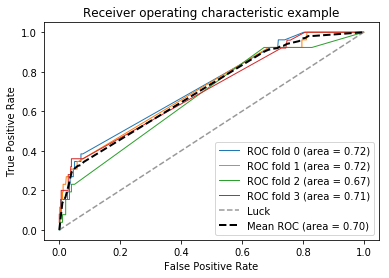

In [32]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

tempTrainData = train_data
tempTestData = test_data
X_train = tempTrainData.drop(["bidder_id", "outcome", "payment_account", "address"], axis=1)
# X_train = tempTrainData["nb0fBids"].reshape(-1, 1)
Y_train = tempTrainData["outcome"]
X=np.array(X_train)
y=np.array(Y_train)
cv = StratifiedKFold(y, n_folds=4)
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (tran, tet) in enumerate(cv):
    probas_ = classifier.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [33]:
rand = RandomForestClassifier(n_estimators=2000,max_depth=25,min_samples_leaf=1)
#rand = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
# rand = LogisticRegression()
rand.fit(X_train[:1020],Y_train[:1020])
prediction = rand.predict_proba(X_train[1020:])
prediction_train = rand.predict_proba(X_train[:1020])
# print (rand.feature_importances_)
from sklearn import metrics
print (metrics.roc_auc_score(Y_train[1020:], prediction[:,1]))

0.6711690945970865


In [36]:
test = test_data
X_test = test.drop(['bidder_id','payment_account','address'],axis=1)

rand = RandomForestClassifier(n_estimators=1000,max_depth=25,min_samples_leaf=1)

#print cross_val_score(svm,X_train,y_train,cv=10).mean()
rand.fit(X_train,Y_train)
prediction = rand.predict_proba(X_test)

test['prediction'] = prediction[:,1]

test[['bidder_id','prediction']].to_csv('submission.csv',index=False)